In [3]:
# SVM on cifar-10
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
%matplotlib notebook

# data_loading code from the official website
def load_cifar10_batch(cifar10_dataset_fold_path, batch_id):
    file = open(cifar10_dataset_fold_path + '/data_batch_' + str(batch_id), 'rb')
    batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    file.close()
    return features, labels

# load training data
cifar10_dataset_fold_path = '/Users/dayao/Desktop/data_mining/final_project/cifar-10-batches-py'
X_train, y_train = load_cifar10_batch(cifar10_dataset_fold_path, 1)
for i in range(2, 6):
    features, labels = load_cifar10_batch(cifar10_dataset_fold_path, i)
    X_train = np.concatenate((X_train, features))
    y_train = np.concatenate((y_train, labels))

# load test data
file = open(cifar10_dataset_fold_path + '/test_batch', 'rb')
batch = pickle.load(file, encoding='latin1')
X_test = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
y_test = batch['labels']
file.close()

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
minmax = MinMaxScaler()
X_train_temp = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test_temp = X_test.reshape(X_test.shape[0], 32 * 32 * 3)
X_train = minmax.fit_transform(X_train_temp)
X_test = minmax.fit_transform(X_test_temp)
# X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# # one-hot encode the labels
# num_classes = 10
# nums_class = []
# for j in range(1, num_classes + 1):
#     nums_class.append(j)
# lb = LabelBinarizer().fit(nums_class)
# y_train = lb.transform(y_train)
# y_test = lb.transform(y_test)

# shuffle the data to make sure there are no underlying distributions
X_train, y_train = shuffle(X_train, y_train, random_state=624)
X_test, y_test = shuffle(X_test, y_test, random_state=624)

# split training data and validation data
# train_size = 0.75
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   train_size = train_size,
#                                                   random_state = 7)

# # use cross-validation to find out the best K of K-NN
# List = list(range(3, 16))
# num_neighbors = list(filter(lambda x: x % 2 == 1, List)) # filter out the odd ones
# cv_scores = []
# # perform 10-folf cross validation
# for k in num_neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', n_jobs=4, cv=10, verbose=1)
#     cv_scores.append(scores.mean())

# # change to misclassification error
# MSE = [1 - x for x in cv_scores]
# # determine best k
# optimal_k = num_neighbors[MSE.index(min(MSE))]
# print("The optimal number of neighbors is ", optimal_k)

# # plot misclassification error vs k
# plt.plot(num_neighbors, MSE)
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Misclassification Error')
# plt.show()

# build a random forest model based on the result of cross-validation
model = SVC(gamma='auto', verbose=True, decision_function_shape='ovo', random_state=927)
print('---------start training---------')
model.fit(X_train, y_train)
print('---------stop training---------')

# score the model
predicts = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicts))

---------start training---------
[LibSVM]---------stop training---------
Accuracy: 0.4398


Normalized confusion matrix


<IPython.core.display.Javascript object>


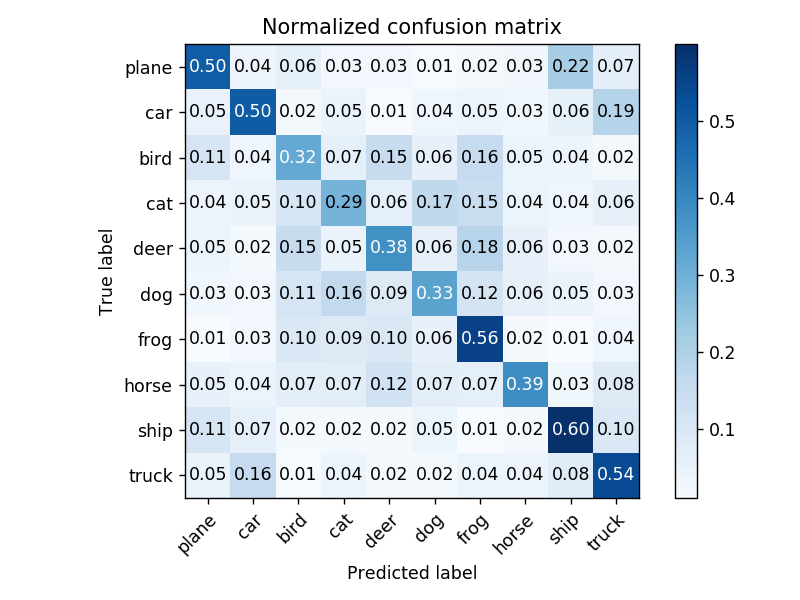

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = list(unique_labels(y_true, y_pred))
#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# print(y_test)
# y_test = y_test.values.argmax(axis=1)
# predicts = predicts.argmax(axis=1)

plot_confusion_matrix(y_test, predicts, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'), 
                      normalize=True, title=None)

plt.show()

<IPython.core.display.Javascript object>


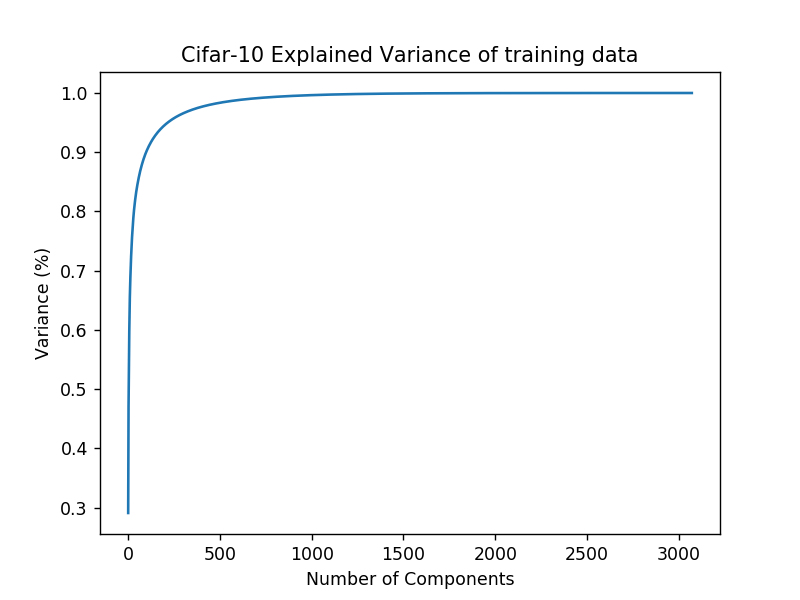

In [6]:
# SVM on cifar-10 after PCA
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
%matplotlib notebook

# data_loading code from the official website
def load_cifar10_batch(cifar10_dataset_fold_path, batch_id):
    file = open(cifar10_dataset_fold_path + '/data_batch_' + str(batch_id), 'rb')
    batch = pickle.load(file, encoding='latin1')
    features = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
    labels = batch['labels']
    file.close()
    return features, labels

# load training data
cifar10_dataset_fold_path = '/Users/dayao/Desktop/data_mining/final_project/cifar-10-batches-py'
X_train, y_train = load_cifar10_batch(cifar10_dataset_fold_path, 1)
for i in range(2, 6):
    features, labels = load_cifar10_batch(cifar10_dataset_fold_path, i)
    X_train = np.concatenate((X_train, features))
    y_train = np.concatenate((y_train, labels))

# load test data
file = open(cifar10_dataset_fold_path + '/test_batch', 'rb')
batch = pickle.load(file, encoding='latin1')
X_test = batch['data'].reshape(len(batch['data']), 3, 32, 32).transpose(0, 2, 3, 1)
y_test = batch['labels']
file.close()

# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
minmax = MinMaxScaler()
X_train_temp = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
X_test_temp = X_test.reshape(X_test.shape[0], 32 * 32 * 3)
X_train_HD = minmax.fit_transform(X_train_temp)
X_test_HD = minmax.fit_transform(X_test_temp)
# X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# determine the components number of PCA on training data
pca_train = PCA().fit(X_train_HD)
# plot the cumulative summation of the explained variance
plt.figure()
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Cifar-10 Explained Variance of training data')
plt.show() # we cawn see when the number of components is 500, we can preserve something around 98% of the total variance of the data


In [7]:
# do the PCA, based on the figures, we choose 600 to be the number of components
pca = PCA(n_components=500)
X_train = pca.fit_transform(X_train_HD)
X_test = pca.transform(X_test_HD)

# # one-hot encode the labels
# num_classes = 10
# nums_class = []
# for j in range(1, num_classes + 1):
#     nums_class.append(j)
# lb = LabelBinarizer().fit(nums_class)
# y_train = lb.transform(y_train)
# y_test = lb.transform(y_test)

# shuffle the data to make sure there are no underlying distributions
X_train, y_train = shuffle(X_train, y_train, random_state=624)
X_test, y_test = shuffle(X_test, y_test, random_state=624)

# split training data and validation data
# train_size = 0.75
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                   train_size = train_size,
#                                                   random_state = 7)

# # use cross-validation to find out the best K of K-NN
# List = list(range(3, 16))
# num_neighbors = list(filter(lambda x: x % 2 == 1, List)) # filter out the odd ones
# cv_scores = []
# # perform 10-folf cross validation
# for k in num_neighbors:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', n_jobs=4, cv=10, verbose=1)
#     cv_scores.append(scores.mean())

# # change to misclassification error
# MSE = [1 - x for x in cv_scores]
# # determine best k
# optimal_k = num_neighbors[MSE.index(min(MSE))]
# print("The optimal number of neighbors is ", optimal_k)

# # plot misclassification error vs k
# plt.plot(num_neighbors, MSE)
# plt.xlabel('Number of Neighbors')
# plt.ylabel('Misclassification Error')
# plt.show()

# build a random forest model based on the result of cross-validation
model = SVC(gamma='auto', verbose=True, decision_function_shape='ovo', random_state=927)
print('---------start training---------')
model.fit(X_train, y_train)
print('---------stop training---------')

# score the model
predicts = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predicts))

---------start training---------
[LibSVM]---------stop training---------
Accuracy: 0.5068


Normalized confusion matrix


<IPython.core.display.Javascript object>


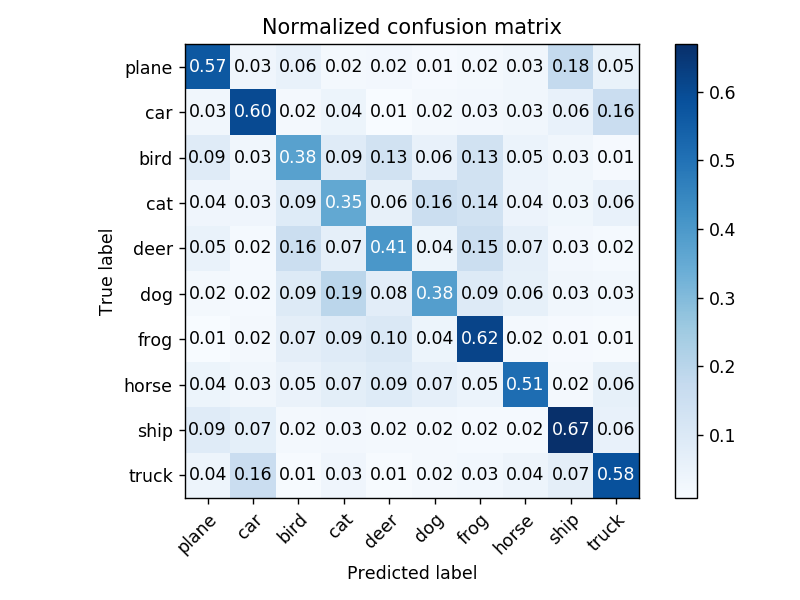

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = list(unique_labels(y_true, y_pred))
#     classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# print(y_test)
# y_test = y_test.values.argmax(axis=1)
# predicts = predicts.argmax(axis=1)

plot_confusion_matrix(y_test, predicts, classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'), 
                      normalize=True, title=None)

plt.show()